In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

In [19]:
def api_runner():
    global df
    if 'df' not in globals():
        df = pd.DataFrame()   #this declares df as a global varaible
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '85956212-19c7-41de-bc58-f6afb3f64150',
    }

    session = Session()
    session.headers.update(headers)

    try:     
        response = session.get(url, params=parameters)
        data = json.loads(response.text)#since we have the original dataframe set up
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e: 
        print(e)
        #this like a loop so we append it to a new dataframe 
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df._append(df2)
    #so basically df2 keeps updatng and it appends its update to a new dataframe df
    
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df                   #after running it once without the csv automation, you can run it again with the csv automation
    #like the above to avoid duplication
    
    if not os.path.isfile(r'C:\Users\user\API.csv'):
        df.to_csv(r'C:\Users\user\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\user\API.csv', mode='a', header=False)#you dont need the header again                                                              
    #lets append it into a csv                                     #WHEN appending rows 

In [20]:
import os
from time import time
from time import sleep
#these are gonna give the ability to track time and run through or call the function in intervals
#that we choose

for i in range(333):#333 runs is the max for running the API for a day
    api_runner()
    print('API run completed!')
    sleep(60) #  1 minute intervals
exit()

API run completed!
API run completed!
API run completed!


KeyboardInterrupt: 

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfg = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
'quote.USD.percent_change_30d','quote.USD.percent_change_60d',	'quote.USD.percent_change_90d']].mean()
dfg

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.440,-0.525,2.913,8.953,-3.799,3.603
Ethereum,-0.402,-1.033,0.318,4.062,-8.724,8.539
Tether USDt,-0.008,-0.050,-0.040,0.056,0.015,0.044
BNB,-0.420,-0.135,2.268,3.622,-3.060,-4.564
Solana,-1.453,1.044,13.175,39.912,6.060,20.607
XRP,-0.590,4.066,3.414,31.454,15.392,18.805
USDC,-0.003,-0.034,-0.020,-0.011,-0.025,-0.027
Dogecoin,-1.491,-0.218,7.378,11.600,-21.770,-13.525
Toncoin,-0.106,1.083,-3.880,-4.190,7.707,28.442


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

dfserie = dfg.stack()
df4 = dfserie.to_frame(name='values')
df5 = df4.reset_index()
dfviz = df5.rename(columns={'level_1': 'percent_change'})
dfviz['percent_change'] = dfviz['percent_change'].replace(['quote.USD.percent_change_1h',
                                                           'quote.USD.percent_change_24h',
                                                           'quote.USD.percent_change_7d',
                                                           'quote.USD.percent_change_30d',
                                                           'quote.USD.percent_change_60d',
                                                           'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
dfviz

,name,percent_change,values
0,Bitcoin,1h,-0.440
1,Bitcoin,24h,-0.525
2,Bitcoin,7d,2.913
3,Bitcoin,30d,8.953
4,Bitcoin,60d,-3.799
...,...,...,...
85,Chainlink,24h,-0.477
86,Chainlink,7d,-2.159
87,Chainlink,30d,3.543
88,Chainlink,60d,-20.293


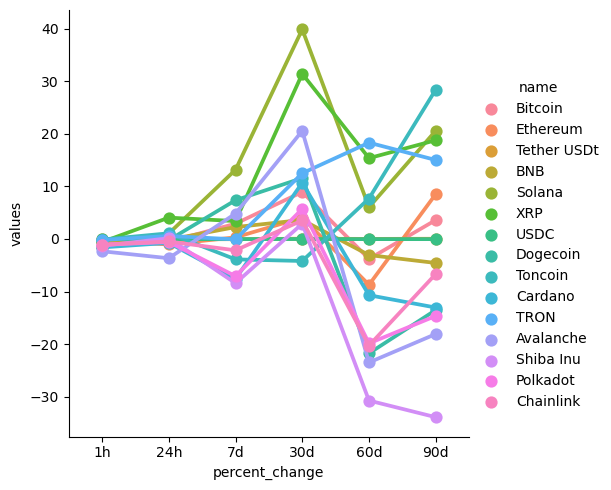

In [25]:
sns.catplot(x='percent_change', y='values', hue='name',data=dfviz, kind='point')

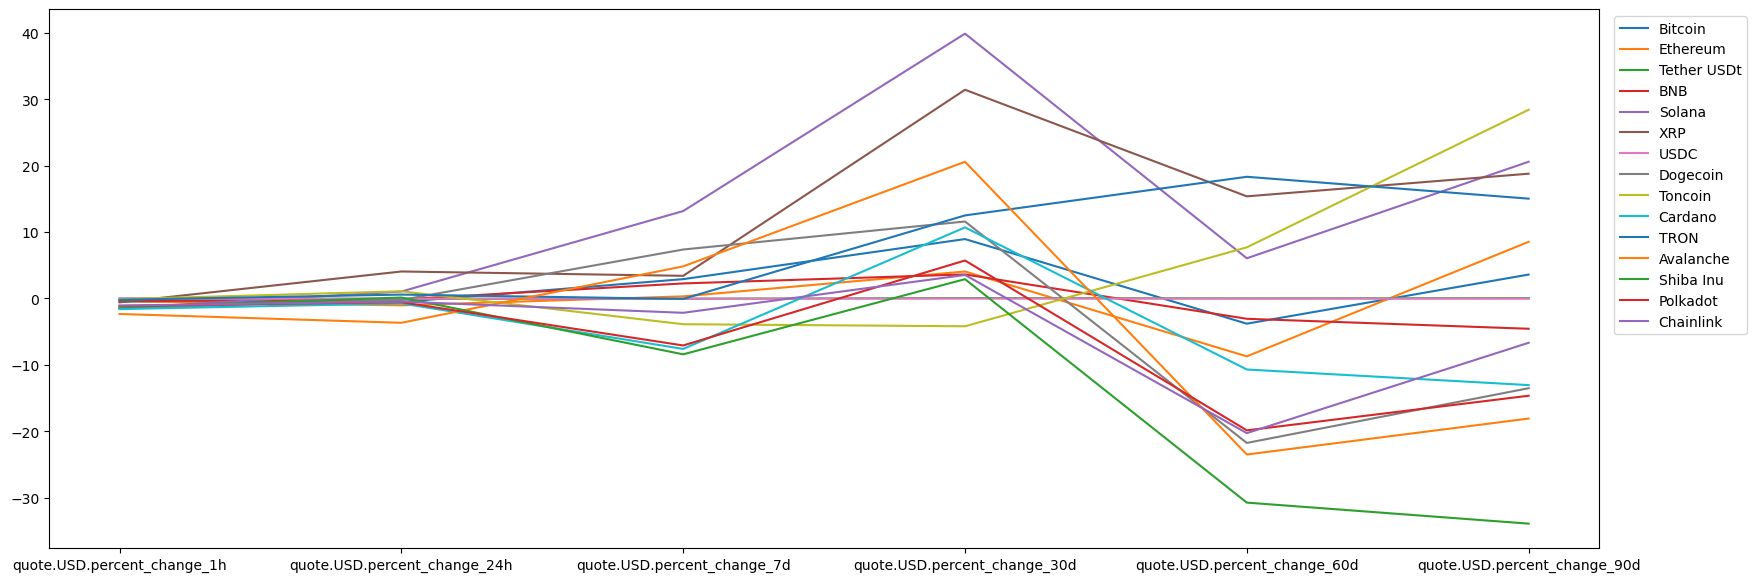

In [28]:
dfg.transpose()
ax = dfg.transpose().plot(figsize= (20,7))
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))

C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\.conda\envs\edo_tensei\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

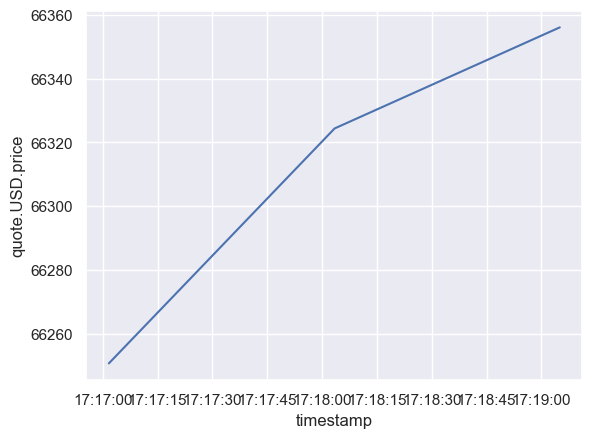

In [29]:
dfk= df[['name', 'quote.USD.price', 'timestamp']]
dfbit = dfk[dfk['name'] == 'Bitcoin']

sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=dfbit )
#price in bitcoin linearly increased over each minitue and then changed from its uniform increase